**University of Bern**  
**CAS Applied Data Science**  
**2019/2020** 
  
**Module 1**
  
### Michael Horn

# Notebook Attachment to the Conceptual Design Report

### Exploration of the [Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine) from the UCI Machine Learning Repository

Load the libraries required for the exploration of the wine data set:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import time

Load the wine data set and get an idea about the data structure:

In [2]:
df_wine = pd.read_csv('wine.data', names=['Variety','Alcohol [%]','Malic acid [g/l]','Ash [g/l]','Alcalinity of ash [ml/l]','Magnesium [mg/l]', 
                                          'Total phenols [mg/l]', 'Flavonoids [mg/l]', 'Nonflavonoid phenols [mg/l]', 'Proanthocyanidins [mg/l]', 
                                          'Color intensity','Hue', 'OD280/OD315 of diluted wines','Proline [mg/l]'])
pd.set_option('display.max_rows', 200)
df_wine

,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045


In [3]:
df_wine.head()

,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df_wine.tail()

,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


Obtain some information about the data frame:

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Variety                         178 non-null int64
Alcohol [%]                     178 non-null float64
Malic acid [g/l]                178 non-null float64
Ash [g/l]                       178 non-null float64
Alcalinity of ash [ml/l]        178 non-null float64
Magnesium [mg/l]                178 non-null int64
Total phenols [mg/l]            178 non-null float64
Flavonoids [mg/l]               178 non-null float64
Nonflavonoid phenols [mg/l]     178 non-null float64
Proanthocyanidins [mg/l]        178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline [mg/l]                  178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


This data set contains 178 observations with 13 variables and 3 categories. Let`s define a dataframe for each category and see how they differ from each other. This we do with some descriptive statistics.

In [6]:
df_wine_1 = df_wine[df_wine['Variety'] == 1] # Barolo
df_wine_2 = df_wine[df_wine['Variety'] == 2] # Grignolino
df_wine_3 = df_wine[df_wine['Variety'] == 3] # Barbera
df_wine_total = [df_wine_1, df_wine_2, df_wine_3]

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
start_time = time.time()
df_wine.describe()
print("This descriptive statistics analysis took %1.4f seconds" % (time.time() - start_time))
df_wine.describe()

This descriptive statistics analysis took 0.0280 seconds


,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [9]:
df_wine_1.describe()

,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
count,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00,59.00
mean,1.00,13.74,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,5.53,1.06,3.16,1115.71
std,0.00,0.46,0.69,0.23,2.55,10.50,0.34,0.40,0.07,0.41,1.24,0.12,0.36,221.52
min,1.00,12.85,1.35,2.04,11.20,89.00,2.20,2.19,0.17,1.25,3.52,0.82,2.51,680.00
25%,1.00,13.40,1.67,2.29,16.00,98.00,2.60,2.68,0.26,1.64,4.55,0.99,2.87,987.50
50%,1.00,13.75,1.77,2.44,16.80,104.00,2.80,2.98,0.29,1.87,5.40,1.07,3.17,1095.00
75%,1.00,14.10,1.94,2.62,18.70,114.00,3.00,3.25,0.32,2.09,6.22,1.13,3.42,1280.00
max,1.00,14.83,4.04,3.22,25.00,132.00,3.88,3.93,0.50,2.96,8.90,1.28,4.00,1680.00


In [10]:
df_wine_2.describe()

,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
count,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00,71.00
mean,2.00,12.28,1.93,2.24,20.24,94.55,2.26,2.08,0.36,1.63,3.09,1.06,2.79,519.51
std,0.00,0.54,1.02,0.32,3.35,16.75,0.55,0.71,0.12,0.60,0.92,0.20,0.50,157.21
min,2.00,11.03,0.74,1.36,10.60,70.00,1.10,0.57,0.13,0.41,1.28,0.69,1.59,278.00
25%,2.00,11.91,1.27,2.00,18.00,85.50,1.90,1.60,0.27,1.35,2.54,0.93,2.44,406.50
50%,2.00,12.29,1.61,2.24,20.00,88.00,2.20,2.03,0.37,1.61,2.90,1.04,2.83,495.00
75%,2.00,12.52,2.15,2.42,22.00,99.50,2.56,2.48,0.43,1.89,3.40,1.21,3.16,625.00
max,2.00,13.86,5.80,3.23,30.00,162.00,3.52,5.08,0.66,3.58,6.00,1.71,3.69,985.00


In [11]:
df_wine_3.describe()

,Variety,Alcohol [%],Malic acid [g/l],Ash [g/l],Alcalinity of ash [ml/l],Magnesium [mg/l],Total phenols [mg/l],Flavonoids [mg/l],Nonflavonoid phenols [mg/l],Proanthocyanidins [mg/l],Color intensity,Hue,OD280/OD315 of diluted wines,Proline [mg/l]
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,3.00,13.15,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,7.40,0.68,1.68,629.90
std,0.00,0.53,1.09,0.18,2.26,10.89,0.36,0.29,0.12,0.41,2.31,0.11,0.27,115.10
min,3.00,12.20,1.24,2.10,17.50,80.00,0.98,0.34,0.17,0.55,3.85,0.48,1.27,415.00
25%,3.00,12.80,2.59,2.30,20.00,89.75,1.41,0.58,0.40,0.85,5.44,0.59,1.51,545.00
50%,3.00,13.16,3.26,2.38,21.00,97.00,1.64,0.69,0.47,1.10,7.55,0.67,1.66,627.50
75%,3.00,13.50,3.96,2.60,23.00,106.00,1.81,0.92,0.53,1.35,9.22,0.75,1.82,695.00
max,3.00,14.34,5.65,2.86,27.00,123.00,2.80,1.57,0.63,2.70,13.00,0.96,2.47,880.00


Now le's have a more human look at the wine data set. Let`s plot the variables against each other and check, whether we can distinguish some patterns.

C:\Users\Michael\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Michael\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


The generation of this scatter matrix took 15.78 seconds


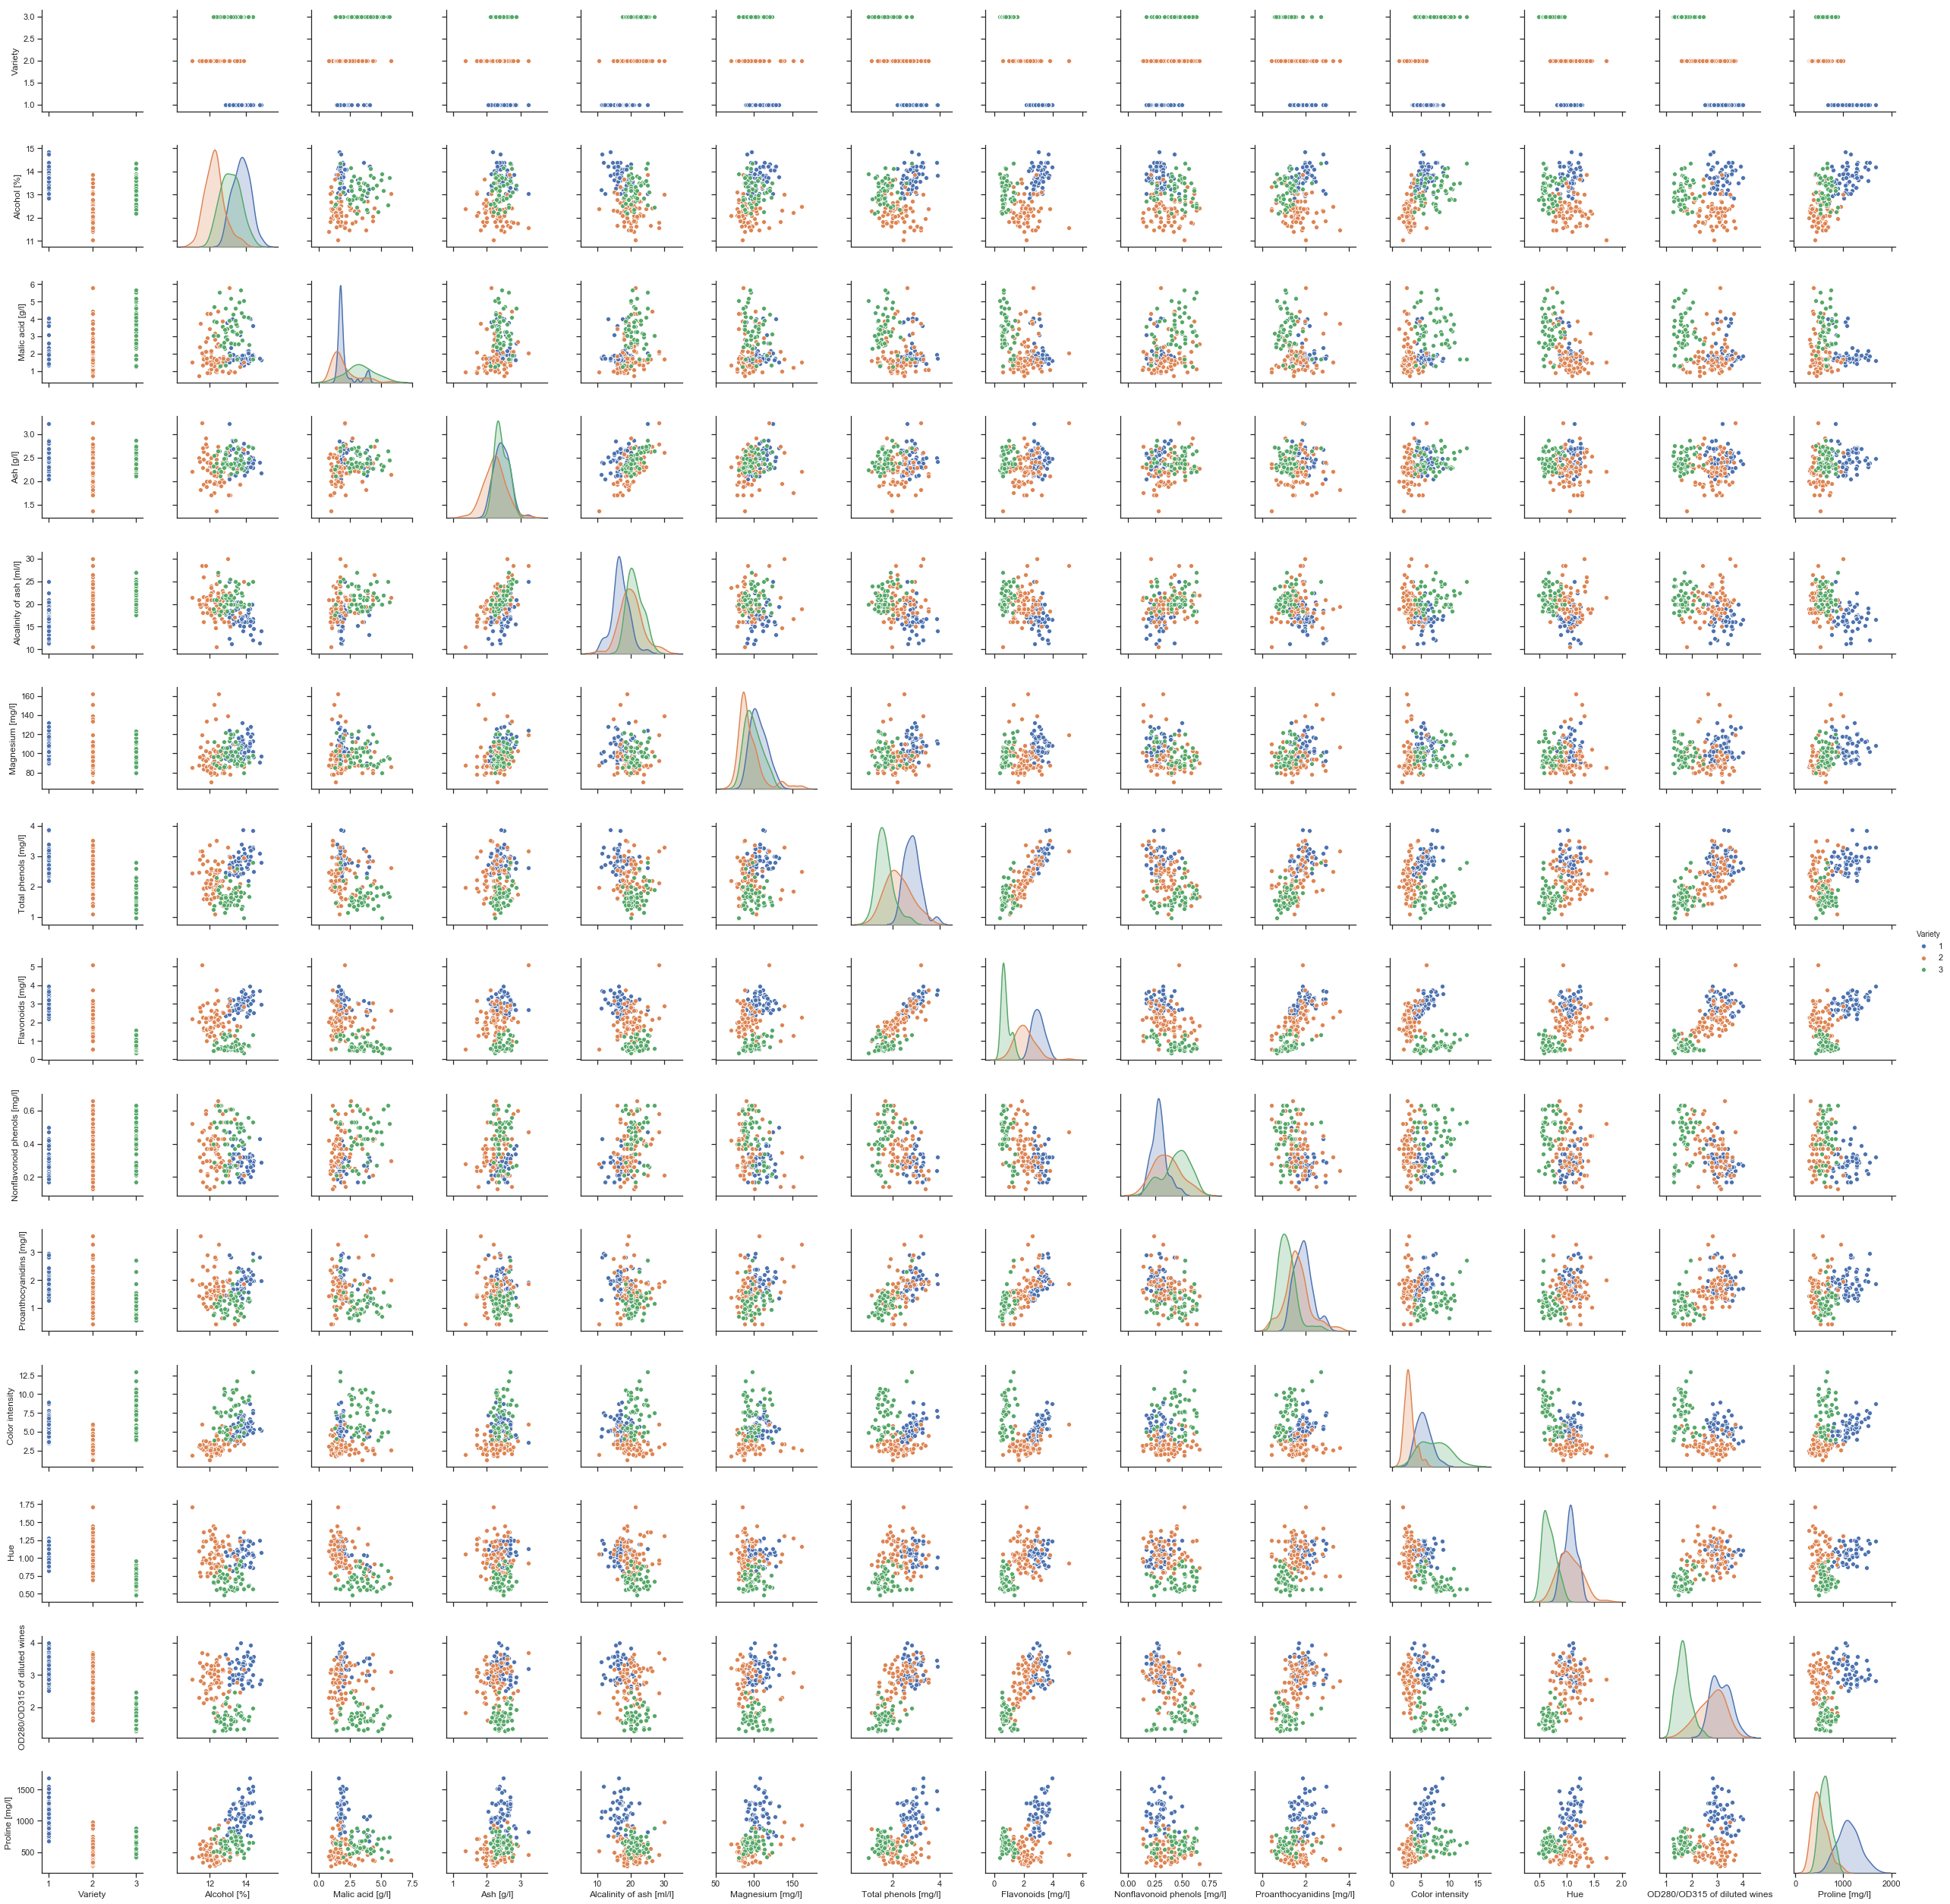

In [12]:
start_time = time.time()
df_wine.iloc[:,df_wine.columns!='Variety']
sns.set(style="ticks")
sns.pairplot(df_wine, hue="Variety")
print("The generation of this scatter matrix took %2.2f seconds" % (time.time() - start_time))
plt.savefig('Scatter_matrix_wine.png', dpi = 600)

**Colour Legend:**  
- orange: Grignolino, Variety 2  
- green: Barbera, Variety 3  
- blue: Barolo, Variety 1  

The scatter matrix gives a lot of information, however for the Conceptual Design Report I need some plots that fit in a figure.  
So, let's plot the wine data set column by column.

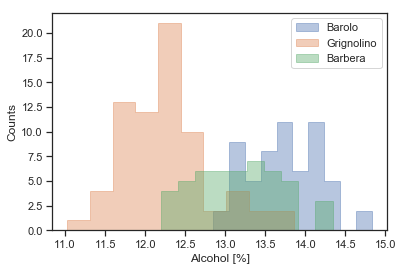

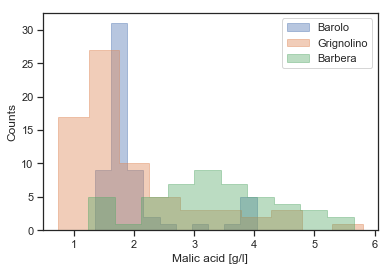

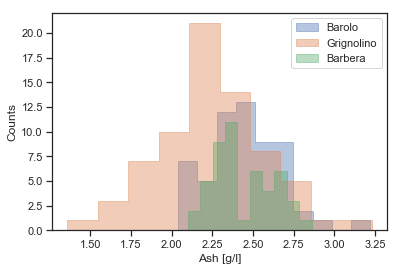

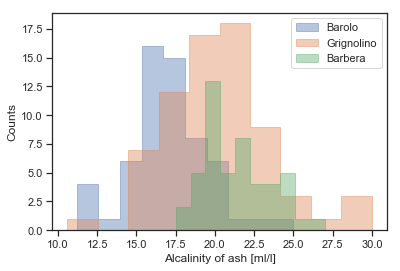

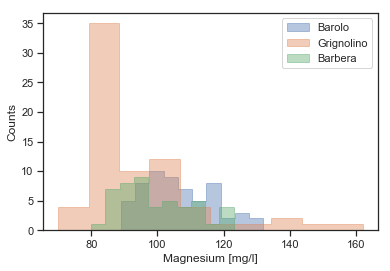

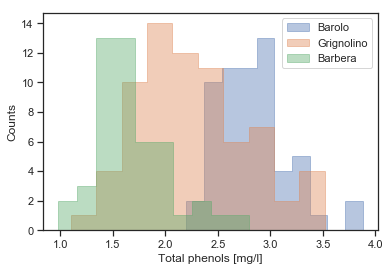

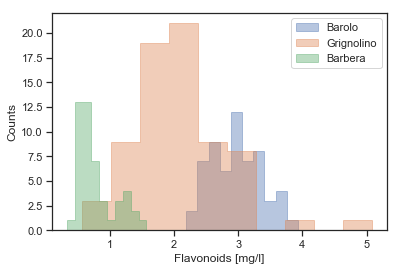

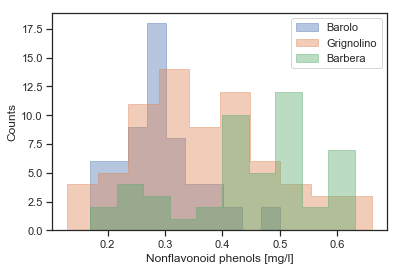

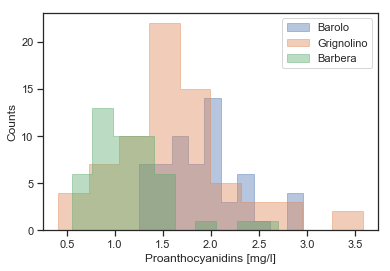

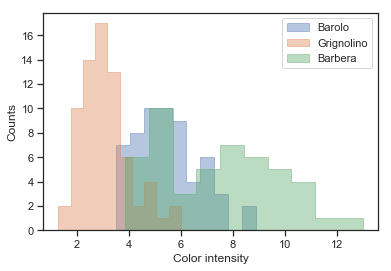

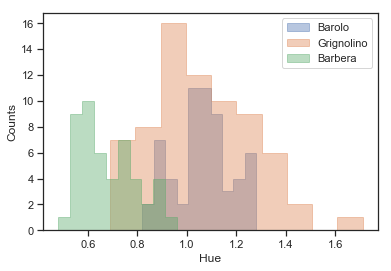

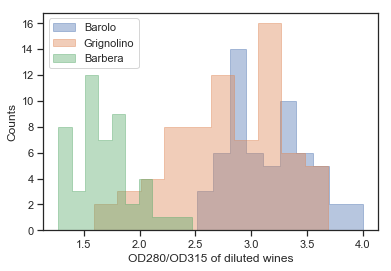

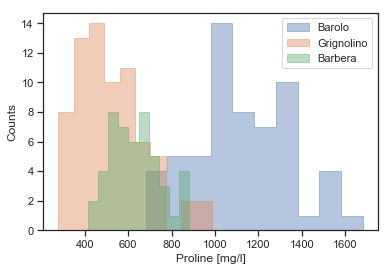

In [13]:
for i in range(1,14): # Loop over variables.
    c = 1
    for df in df_wine_total[0:3]: # Loop over varieties.
        if 0 < c < 2:
            name = 'Barolo'
        elif 1 < c < 3:
            name = 'Grignolino'
        else:
            name = 'Barbera'
        df.iloc[:,i].plot(kind = "hist", fill = True, alpha = 0.4, histtype = 'step', label = str(name))
        c += 1
    plt.legend()
    plt.ylabel('Counts')
    plt.xlabel(df_wine.columns[i])
    plt.show()